<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/Breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
breast_data = load_breast_cancer()

In [2]:
breast_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
y = breast_data.target
X= breast_data.data

X.shape, y.shape

((569, 30), (569,))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1230)

X_train.shape, y_train.shape

((426, 30), (426,))

모델링
1. 모델 구조 설계
2. 모델 학습/평가 방법 설정
3. 모델 학습 및 학습결과 시각화
4. 모델 평가



In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

# 1. 모델 구조 설계
model = Sequential()
model.add(InputLayer(input_shape=(30,))) # 입력되는(학습 될) 데이터의 크기
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

Epoch 1/300
11/11 [==============================] - 2s 36ms/step - loss: 0.7081 - accuracy: 0.6029 - val_loss: 0.6312 - val_accuracy: 0.6628
Epoch 2/300
11/11 [==============================] - 0s 10ms/step - loss: 0.6689 - accuracy: 0.6029 - val_loss: 0.6198 - val_accuracy: 0.6628
Epoch 3/300
11/11 [==============================] - 0s 7ms/step - loss: 0.6496 - accuracy: 0.6029 - val_loss: 0.6090 - val_accuracy: 0.6628
Epoch 4/300
11/11 [==============================] - 0s 6ms/step - loss: 0.6341 - accuracy: 0.6029 - val_loss: 0.6051 - val_accuracy: 0.6628
Epoch 5/300
11/11 [==============================] - 0s 7ms/step - loss: 0.6240 - accuracy: 0.6029 - val_loss: 0.5974 - val_accuracy: 0.6628
Epoch 6/300
11/11 [==============================] - 0s 9ms/step - loss: 0.6126 - accuracy: 0.6029 - val_loss: 0.5867 - val_accuracy: 0.6628
Epoch 7/300
11/11 [==============================] - 0s 8ms/step - loss: 0.6010 - accuracy: 0.6029 - val_loss: 0.5825 - val_accuracy: 0.6628
Epoch 8/300

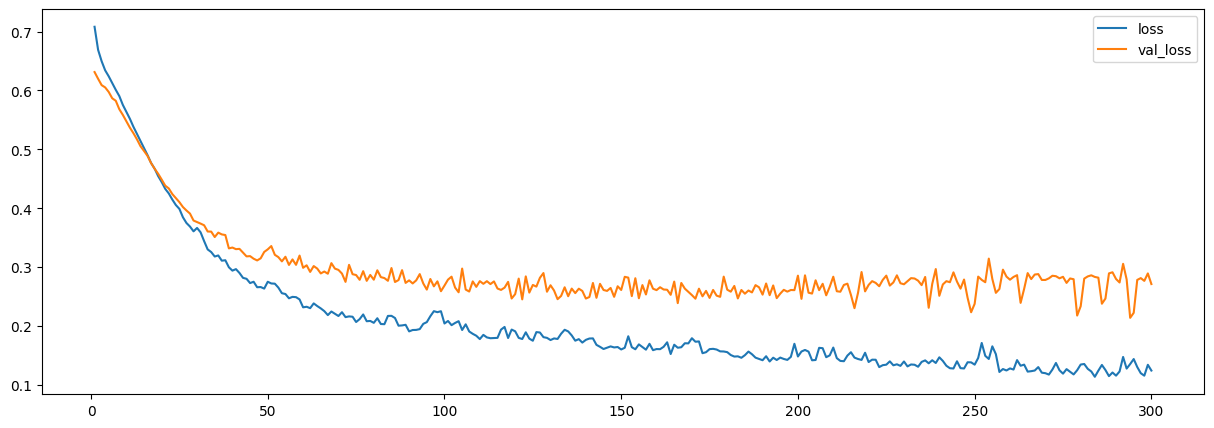

In [8]:
# 2. 모델 학습/평가 방법 설정
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# 3. 모델 학습 및 학습결과 시각화
breast_history = model.fit(X_train, y_train, validation_split=0.2, epochs=300)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
# 훈련 데이터에 대한 그래프
plt.plot(range(1,301), breast_history.history['loss'],label='loss')
# 검증데이터에 대한 그래프
plt.plot(range(1,301), breast_history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()



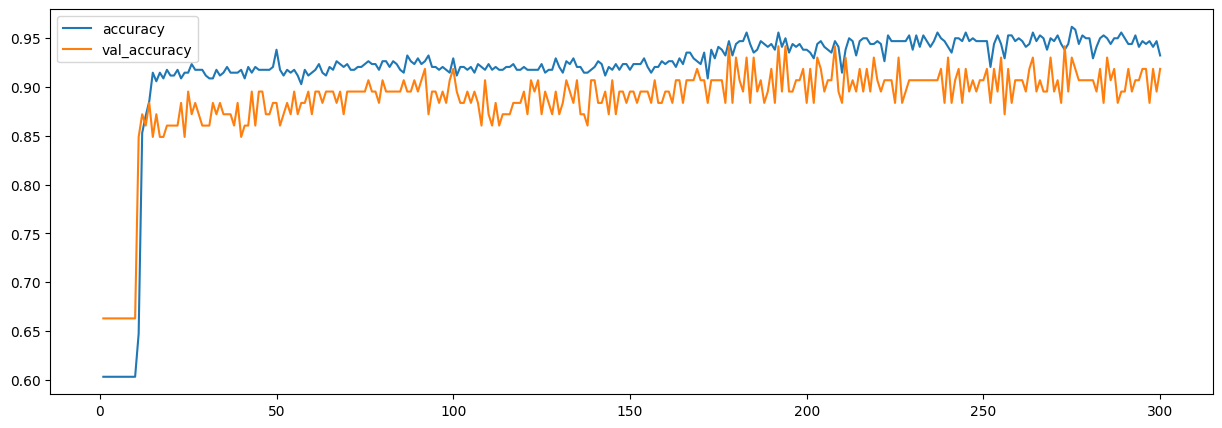

5/5 [==============================] - 0s 3ms/step - loss: 0.2662 - accuracy: 0.9021


[0.26624369621276855, 0.9020978808403015]

In [10]:
# 정확도로 그래프 그리기
plt.figure(figsize=(15,5))
# 훈련 데이터에 대한 그래프
plt.plot(range(1,301), breast_history.history['accuracy'],label='accuracy')
# 검증데이터에 대한 그래프
plt.plot(range(1,301), breast_history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# 4. 모델평가
model.evaluate(X_test,y_test)
